In [1]:
import torch
import torchvision

In [2]:
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [4]:
%matplotlib inline

horse ship bird frog


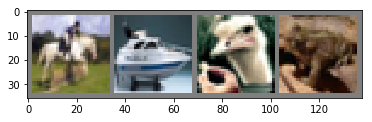

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s'% classes[labels[j]] for j in range(4)))

In [7]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class myNet(nn.Module):
    def __init__(self):
        super(myNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = myNet()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

In [10]:
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [12]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[{0:d},{1:5d}] loss: {2:.3f}'.format(epoch + 1, i + 1, running_loss /2000))
            running_loss = 0.0
print("Finished Training")
        

[1, 2000] loss: 1.925
[1, 4000] loss: 1.682
[1, 6000] loss: 1.599
[1, 8000] loss: 1.516
[1,10000] loss: 1.494
[1,12000] loss: 1.434
[2, 2000] loss: 1.352
[2, 4000] loss: 1.359
[2, 6000] loss: 1.318
[2, 8000] loss: 1.272
[2,10000] loss: 1.278
[2,12000] loss: 1.246
Finished Training


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

GroundTruth : cat ship ship plane


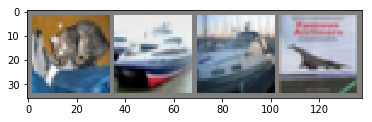

In [15]:
imshow(torchvision.utils.make_grid(images))
print("GroundTruth :", " ".join('{}'.format( classes[labels[j]]) for j in range(4)))

In [16]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)
print("predicted: ", " ".join('{}'.format( classes[predicted[j]]) for j in range(4)))

predicted:  ship ship ship ship


In [20]:
correct = 0 
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print("Accuracy of the network on the 10000 test images: {:.2f}%".format(100 * correct/total))

Accuracy of the network on the 10000 test images: 56.12%


In [22]:
class_correct = list(np.zeros(10))
class_total = list(np.zeros(10))

In [88]:
for data in testloader:
    images, labels =data
    outputs = net(Variable(images))
    _,predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
results = [ 100 * class_correct[i]/class_total[i] for i in range(10)]
p_results = sorted(list(zip(list(classes), results)), key = lambda x: x[1])
for i in range(10):
    print(" Accuracy of {}: {:.2f} %".format(p_results[i][0], p_results[i][1]))

 Accuracy of cat: 26.30 %
 Accuracy of bird: 36.80 %
 Accuracy of deer: 40.10 %
 Accuracy of truck: 47.40 %
 Accuracy of plane: 49.20 %
 Accuracy of horse: 62.50 %
 Accuracy of dog: 68.70 %
 Accuracy of frog: 70.90 %
 Accuracy of car: 78.70 %
 Accuracy of ship: 80.60 %
